# Identifying patterns for successful computer games

We have data from open sources on the number of copies of computer games sold up to 2016.

**The main goal of the project** is to find patterns for successful computer games based on data up to 2016 in order to give recommendations for planning the advertising budget for 2017. By success, in this analysis we will mean the number of copies sold. Factors such as profit earned and sales volumes are not taken into account due to the lack of incoming data.

**Project structure:**
    
<a href='#1'><h5>1. Data overview </a>
<a href='#2'><h5>2. Data preparation </a>
<a href='#3'><h5>3. Data analysis </a>
<a href='#4'><h5>4. Portrait of users by region </a>
<a href='#5'><h5>5. Hypothesis testing </a>
<a href='#6'><h5>6. General conclusion </a>

## 1. Data overview <a id='1'></a>

### Loading libraries and databases

In [1]:
# loading the library pandas
import pandas as pd

# getting the name of the file when uploading
import os

# loading the library NumPy
import numpy as np

# loading the library matplotlib for boxploat
import matplotlib.pyplot as plt

# import scipy for calculate statistical significance
from scipy import stats as st

In [2]:
# loading the database
# df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

# loading the database from server or PC
# attempt_1 - the path and name of the file to download from the server
# attempt_2 - the path and name of the file to download from the PC

attempt_1 ='https://code.s3.yandex.net/datasets/games.csv'
attempt_2 ='C://yandex_data_sets/04_games.csv'

# gettimg file name from the specified path
name_os_data = os.path.basename(attempt_1)
print('File name:',name_os_data)

# handling errors in the process of downloading a file
try:
    df = pd.read_csv(attempt_1) 
    print(name_os_data, 'has been downloaded from the server')
except:
    print('Server error')
try:
    df = pd.read_csv(attempt_2) 
    print(name_os_data, 'has been downloaded from local host')
except:
    print('Local Error')

File name: games.csv
games.csv has been downloaded from the server
games.csv has been downloaded from local host


In [3]:
# output the table header
display(df.head(3))

# data types
df.info()

# we output a description of the data, medians, average
df.describe()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
# unique list of Rating values
# consider the categories

rating_unique = (df['Rating'].unique())
for index in rating_unique:
    print(index)

E
nan
M
T
E10+
K-A
AO
EC
RP


### Data loading: conclusions

The data is loaded correctly, there are no critical comments.
- change the User_Score data type, from object to float
- change the titles of the titles
- there are omissions: Critic_Score, User_Score, Rating. We can immediately say that to assess the popularity of the game, such indicators of the game as the critics' assessment, player evaluation and rating are key metrics. Due to the large number of omissions in this data, it can be said in advance that the analysis conclusions related to these metrics may be controversial.

## Data preparation <a id='2'></a>

### Title titles

In [5]:
# output headers
display(df.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Identified errors:
* All headings start with a capital letter, replace with uppercase.
* Rating will be replaced by rating_esrb, because only this company's rating is present in this data.

In [6]:
# rename
df = df.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre',
                        'NA_sales':'na_sales', 'EU_sales':'eu_sales','JP_sales':'jp_sales', 'Other_sales':'other_sales', 'Critic_Score':'critic_score', 
                        'User_Score':'user_score', 'Rating':'rating_esrb'
                        })
display(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating_esrb'],
      dtype='object')

### Missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating_esrb      9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Consider empty values in name

In [8]:
# filtering by empty lines
display(df[df['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


From the available data, it can be seen that these are records of games for 1993 and they have no informative value, let's delete these two lines.

In [9]:
# deleting rows, NaN occurs in the name column
# resetting indexes after deletion
df = df.dropna(subset=['name',]).reset_index(drop=True)

# let's check the indexing and the total amount of data after deletion
display(df.head(3))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


### Games by year of release

There are gaps in the data, but since there is no way to fill in the missing values and filling in with an average or median will lead to distortion, we will leave these data unchanged.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating_esrb      9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Player Rating / User_score

The user_score data type is set as a string, let's check this data.

In [11]:
# list of unique user_score values
# consider the categories

pd.options.display.max_rows = 100
df_user_score_group = df.groupby('user_score')['user_score'].count()
print(df_user_score_group)

user_score
0         1
0.2       2
0.3       2
0.5       2
0.6       2
0.7       2
0.9       2
1         2
1.1       2
1.2       3
1.3       2
1.4       5
1.5       2
1.6       3
1.7       9
1.8       6
1.9       2
2        11
2.1       9
2.2       6
2.3       2
2.4      11
2.5      12
2.6       4
2.7       8
2.8      24
2.9       9
3        21
3.1      23
3.2      13
3.3      15
3.4      23
3.5      26
3.6      20
3.7      19
3.8      28
3.9      13
4        27
4.1      33
4.2      28
4.3      37
4.4      33
4.5      34
4.6      37
4.7      24
4.8      49
4.9      40
5        64
5.1      44
5.2      57
5.3      70
5.4      72
5.5      71
5.6      72
5.7      78
5.8      97
5.9      77
6       127
6.1      84
6.2     113
6.3     138
6.4     107
6.5     125
6.6     148
6.7     128
6.8     197
6.9     143
7       220
7.1     180
7.2     167
7.3     236
7.4     215
7.5     251
7.6     220
7.7     240
7.8     324
7.9     249
8       290
8.1     244
8.2     282
8.3     254
8.4     223
8.5  

Consider rows with data tbd

In [12]:
# filter the data by value  tbd
display(df.loc[df.loc[:,'user_score'] == 'tbd'].head(3))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T


In total, we get 2376 rows with this value. According to Wikipedia, the abbreviation tbd can be deciphered as To be declared, similar to the term To be announced (TBA) - the details may have been determined, but are not yet ready for announcement. Judging by a random sample, this data refers to the 2001 game, which indicates that the data will no longer be specified. From the studied sample of 15958 rows, these data represent 15%, which is very significant, and if we take into account the fact that user evaluation is one of the main indicators for determining the rating of the game, then it is necessary to ask clarifying questions about the omission of this data, there may be ways to obtain this data.

Also considering the "User Rating" data, it is necessary to take into account the fact that 6123 rows have missing values, which together with tdb data forms 53% of all data, as a result, it turns out that one of the key indicators of the game rating is relevant by less than half. Clarifying questions should be asked about these data.

At this stage of the study, we will take into account the fact that the data "User Rating" is relevant only by 47%

In [13]:
# replace the values
## alternativ
## df['user_score']=df['user_score'].apply(lambda x: np.nan if x=='tbd' else x)

df['user_score'] = df['user_score'].replace('tbd', np.nan)

Let's change a real data type to an integer data type using the astype() method
Attempting to change the data type causes an error, so let's consider all data types - user rating

In [14]:
# set the function and get a data type in each row

def type_curreny(val):
    return type(val)

# set a variable with the resulting data type
df_type = df['user_score'].apply(type_curreny)

print(df_type.unique())

[<class 'str'> <class 'float'>]


To do this, we will use another method.

we will use the to_numeric method to replace the data, as an argument for error handling we will use coerce, replacing with Nan.

In [15]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [16]:
# check the data type after the change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating_esrb      9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


To fill in the missing Nan values, consider the median and average values for evaluating users.

In [17]:
# Consider the median and average values for Evaluating users

user_score_median = df['user_score'].median()
user_score_mean = df['user_score'].mean()

print('The median value for evaluating players', user_score_median)
print('The average value for evaluating players', user_score_mean)

The median value for evaluating players 7.5
The average value for evaluating players 7.1250461133070315


It is known that the median is more resistant to outliers, so we will use the median to fill in the missing values.

Although in this case it is obvious that the values do not differ much.

Replacing Nan values with the median value in the player ratings leads to an increase in the average user score by 0.2 points. To reduce data distortion, we will leave these omissions unchanged.

### Critic score

Grouping and viewing all data:

In [18]:
# Grouping and viewing all data critic_score:

pd.options.display.max_rows = 100
df_user_score_group = df.groupby('critic_score')['critic_score'].count()
print(df_user_score_group)

critic_score
13.0      1
17.0      1
19.0      6
20.0      3
21.0      1
22.0      1
23.0      4
24.0      4
25.0      7
26.0     12
27.0      8
28.0     11
29.0      3
30.0     12
31.0      9
32.0     15
33.0     22
34.0     10
35.0     27
36.0     26
37.0     28
38.0     34
39.0     39
40.0     26
41.0     29
42.0     37
43.0     54
44.0     50
45.0     47
46.0     56
47.0     66
48.0     67
49.0     86
50.0     79
51.0     90
52.0     73
53.0    103
54.0    103
55.0    110
56.0    113
57.0    132
58.0    151
59.0    157
60.0    156
61.0    165
62.0    170
63.0    178
64.0    169
65.0    192
66.0    203
67.0    182
68.0    219
69.0    215
70.0    256
71.0    254
72.0    226
73.0    238
74.0    226
75.0    245
76.0    235
77.0    225
78.0    240
79.0    218
80.0    237
81.0    218
82.0    208
83.0    206
84.0    183
85.0    151
86.0    137
87.0    118
88.0    116
89.0    105
90.0     76
91.0     70
92.0     54
93.0     47
94.0     37
95.0     16
96.0     18
97.0     11
98.0      4
Nam

To fill in the missing Nan values, consider the median and mean for the critics score.

In [19]:
# Consider the median and mean for the Critics' Rating

critic_score_median = df['critic_score'].median()
critic_score_mean = df['critic_score'].mean()

print('Median for critic score', critic_score_median)
print('Mean for  critic score', critic_score_mean)

Median for critic score 71.0
Mean for  critic score 68.96767850559173


Due to the fact that replacing the data with medial leads to a change in the average value by 1.0 points, we will leave these data with the existing gaps.

### Rating ESRB

In [20]:
# grouping and viewing all data rating_esrb:

pd.options.display.max_rows = 100
df_user_score_group = df.groupby('rating_esrb')['rating_esrb'].count()
print(df_user_score_group)

rating_esrb
AO         1
E       3990
E10+    1420
EC         8
K-A        3
M       1563
RP         3
T       2961
Name: rating_esrb, dtype: int64


There are gaps and there are atypical values:

* AO
* EC
* k-A
* RP

Let's compare this data with the description Entertainment Software Rating Board

* «EC» («Early childhood») — «For younger children» (from 3 years)
* «E» («Everyone»)  - originally "K-A" ("Kids to Adults")
* «E10+» («Everyone 10 and older») 

* «T» («Teen») —  (from 13-ти years)
* «M» («Mature») — (from 17-ти years)
* «AO» («Adults Only 18+») — (years 18-ти years)
* «RP» («Rating Pending») 

As a result, it turns out that all the data are correct, except for K-A, this rating will be replaced by E

In [21]:
df['rating_esrb'] = df['rating_esrb'].replace('K-A', "E")

In [22]:
# проверим данные данные rating_esrb:

pd.options.display.max_rows = 100
df_user_score_group = df.groupby('rating_esrb')['rating_esrb'].count()
print(df_user_score_group)

rating_esrb
AO         1
E       3993
E10+    1420
EC         8
M       1563
RP         3
T       2961
Name: rating_esrb, dtype: int64


Let's fill in the blanks rating_esrb

A game without a rating of 39%, it must be taken into account that in % this will be the largest group, change this type to the ND (not defined) group

In [23]:
df['rating_esrb'] = df['rating_esrb'].fillna(value='ND')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating_esrb      16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### Duplicates and Data Types

In [25]:
# Check the data for obvious duplicates

display('explicit duplicates ', df.duplicated().sum()) #  ['name'].unique()

'explicit duplicates '

0

In [26]:
display('Possible duplicates ', df[['name', 'platform']].duplicated().sum()) #  ['name'].unique()

'Possible duplicates '

4

In [27]:
# consider these values

df_dubble = df[['name', 'platform']].duplicated()

display(df[df_dubble])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb
1590,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4126,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11714,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
16228,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


Due to the fact that these data are few and upon closer examination they do not look like duplicates, we will leave this data.

### Total sales across all regions

In [28]:
# add the value of sales for all regions
# check data
# alternativ 
# df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

df['sum_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,ND,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


Consider omissions after the data preparation step

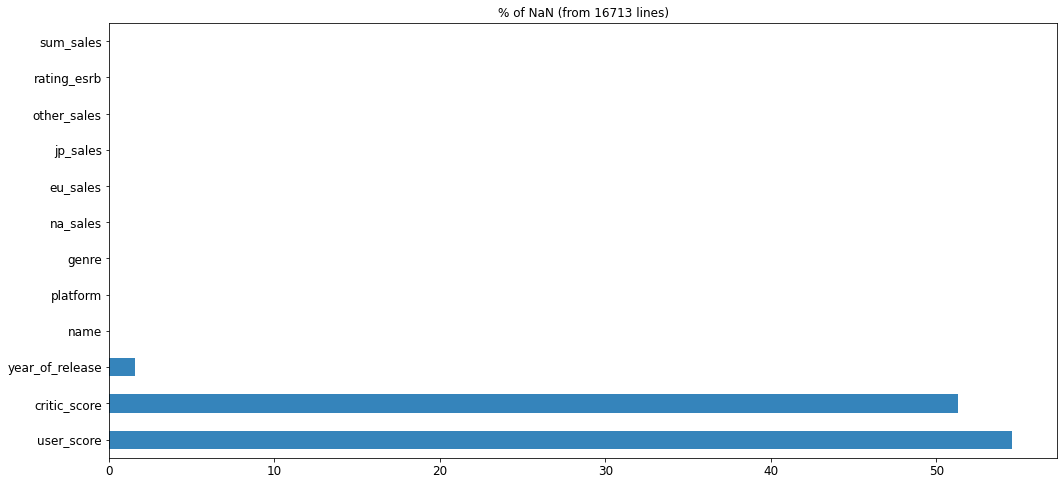

In [29]:
percent_of_nulls = (df.isnull().sum()/len(df)*100).sort_values(ascending=False).round(2)

#df.info()
#print(percent_of_nulls)

percent_of_nulls.plot(kind='barh', figsize=(17, 8), title='% of NaN (from {} lines)'.format(len(df)), 
                               color='#3584BB', legend=False, fontsize=12);

### Conclusions on the stage of data preparation

* changed column names
* removed two lines with missing game names
* all values are filtered by the year of release, the selection includes games from 1995 release
* empty values are filled on the median for the rating of players and rating of critics
* changed values for ESRB rating
* data type changed to integer
* added a column with the total value of sales for all regions
* **Relevance of "Player Rating" data is only 47%**
* **Relevance of "Critic Rating" data is only 50%**
* There are too many missing values for Player Rating and Critics Rating data, it is difficult to make a correct guess as to why these gaps occur, but given that this information is key in estimating the number of game sales, it is desirable to do more work to collect these data. As part of this project, it should be noted once again that the conclusions drawn from these data may be controversial.

## Data analysis <a id='3'></a>

### Games by release year

Consider games by release year.
To do this, we use the groupby method.

In [30]:
df_year = df.groupby('year_of_release')[['year_of_release']].agg(['count']).reset_index()
df_year.columns = ['year of release', 'count']
display(df_year)

,year of release,count
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


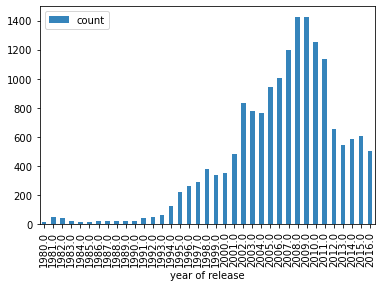

In [31]:
# for analyze the data, we will build a graph

df_year.plot(x='year of release', y='count', kind='bar', alpha=0.9);
#df.sort_values('last_price').plot(x='last_price', y='total_area', kind='scatter', alpha=0.1)

The graph clearly shows that the active growth in the release of games begins in 1994, in addition, the Entertainment Software Rating Board (ESRB) - a non-governmental organization began its activity just in 1994, it can be assumed that the classification of ESRB games will begin in 1994, you also need to take into account the fact that computer games are developing very quickly and data on the release of 10 years ago may simply not be relevant.

For evaluation, we will take data from 2012, so we will get a sample for 5 years.

For filtering, use the query method

In [32]:
# filter out games released after 2011
# reset the index

df = df.query('year_of_release > 2011').reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   float64
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating_esrb      2886 non-null   object 
 11  sum_sales        2886 non-null   float64
dtypes: float64(8), object(4)
memory usage: 270.7+ KB


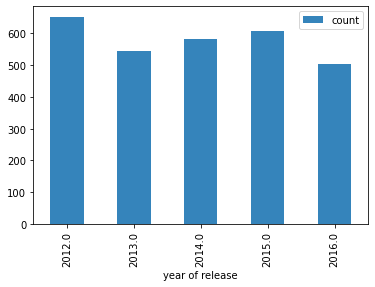

In [33]:
# graph for games over the past 5 years

df_year = df.groupby('year_of_release')[['year_of_release']].agg(['count']).reset_index()
df_year.columns = ['year of release', 'count']

df_year.plot(x='year of release', y='count', kind='bar', alpha=0.9);

### Sales by platform

In [34]:
# group data by platform
# and count the number for each platform

df_platform = df.groupby('platform')['platform'].count().sort_values(ascending=False)
print('Count of platform', df_platform)

Count of platform platform
PS3     493
PSV     411
3DS     396
PS4     392
X360    292
PC      250
XOne    247
PSP     173
WiiU    147
Wii      54
DS       31
Name: platform, dtype: int64


In [35]:
# sum up the number of sales for different platforms

df_platform_sum = df.groupby('platform')['sum_sales'].sum().sort_values(ascending=False)
print('Summ of sale for each platform', df_platform_sum)

Summ of sale for each platform platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: sum_sales, dtype: float64


From the analysis of the two tables, it is safe to say that the most popular platforms bring in the most sales.

Let's analyze the change in sales for each platform for the year, for this we sort the top 7 platforms by sales.

In [36]:
df_platform_sale = df[df['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4'])]
display(df_platform_sale.head(3))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb,sum_sales
0,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,ND,14.63


In [37]:
df_platform_sale_pvt = df_platform_sale.pivot_table(index=['year_of_release'], columns='platform', values='sum_sales', aggfunc=['sum']).reset_index()
df_platform_sale_pvt.columns = ['year_of_release', 'DS', 'PS3', 'PS4','Wii','X360']

display(df_platform_sale_pvt)

,year_of_release,DS,PS3,PS4,Wii,X360
0,2012.0,11.01,107.36,NaN,21.71,99.74
1,2013.0,1.54,113.25,25.99,8.59,88.58
2,2014.0,NaN,47.76,100.00,3.75,34.74
3,2015.0,NaN,16.82,118.90,1.14,11.96
4,2016.0,NaN,3.60,69.25,0.18,1.52


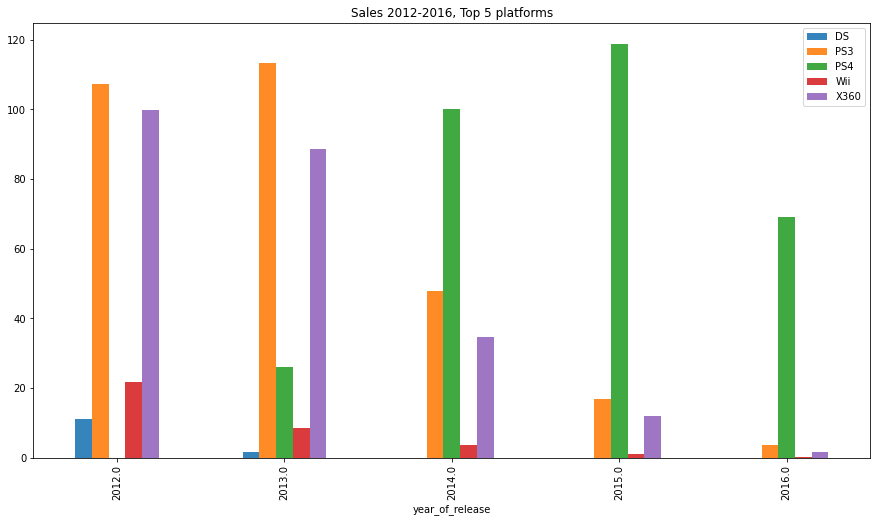

In [38]:
df_platform_sale_pvt.plot(x='year_of_release', y=['DS', 'PS3', 'PS4','Wii','X360'],
                          title='Sales 2012-2016, Top 5 platforms', kind='bar', figsize=(15, 8), alpha=0.9);
#plt.title('Platforms');


### Conclusions: sales for 5 years, TOP5 platforms

* the graph shows that the characteristic period for the appearance of new and the disappearance of old platforms is 7-8 years. This is clearly seen in the top sellers: PS, PS2, DS, Wii

* the graph shows that since 2005 there has been a sharp increase in the number of gaming platforms: before that there were only 3
* for further analysis, we will take data for 5 years: from 2012 to 2016. On the one hand, data on platforms will not be relevant for 20016. the term for the appearance of new platforms is 7-8 years, on the other hand, in 10 years it will be possible to track the dynamics by genre, and the possible migration of some genres from one platform to another, which will make it possible to make some forecasts.


### Consider the TOP platforms

Let's build a graph to evaluate the platforms.

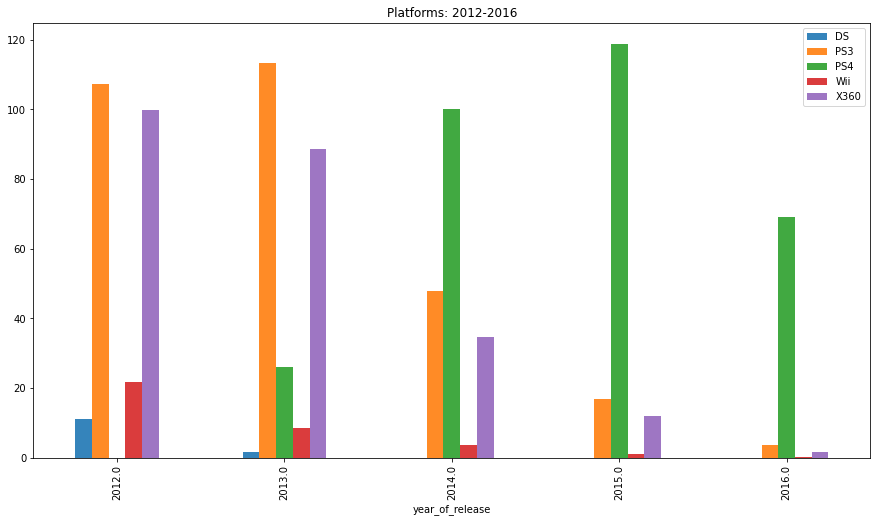

In [39]:
# build a new graph
df_platform_sale_pvt.plot(x='year_of_release',
                               title='Platforms: 2012-2016', kind='bar', figsize=(15, 8), alpha=0.9);


### Let's plot "Box with whiskers"

(0.0, 10.0)

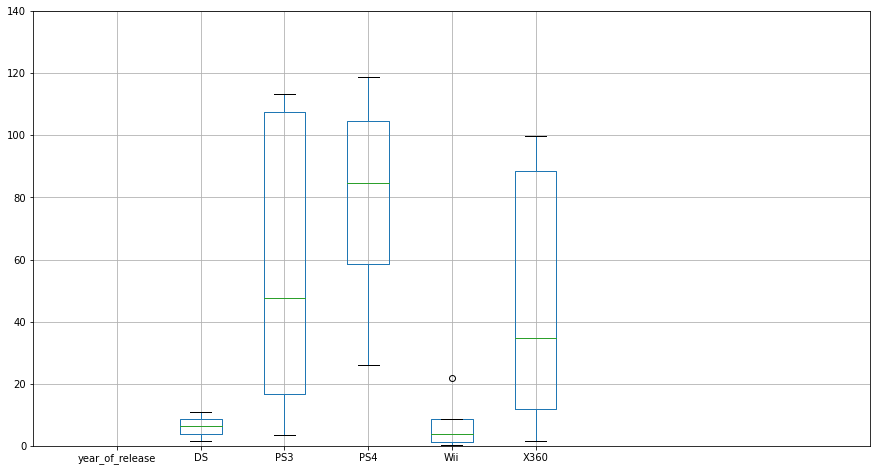

In [40]:
df_platform_sale_pvt.boxplot(figsize=(15, 8))
plt.ylim(0, 140) # y-axis (vertical) limits
plt.xlim(0, 10) # limits on the x-axis (horizontal)

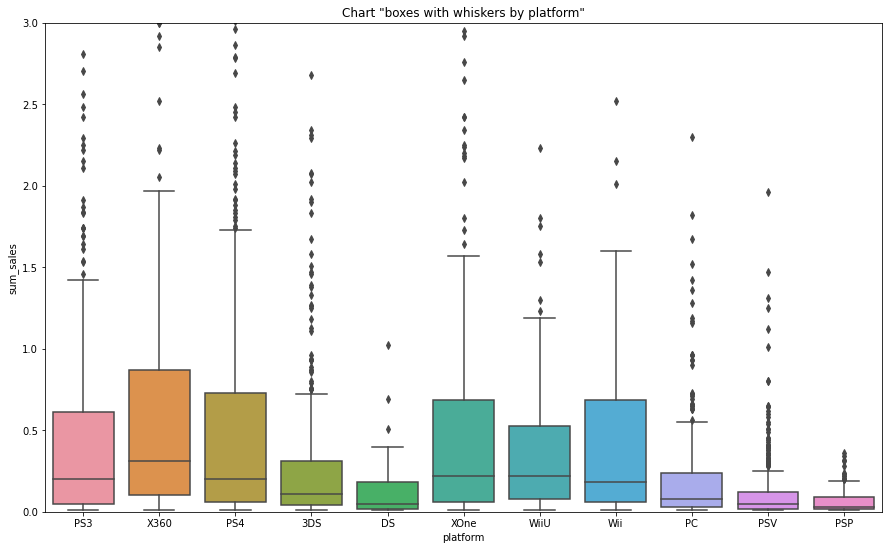

In [41]:
# chart "boxes with whiskers by platform
import seaborn as sns

plt.figure(figsize= (15, 9))
sns.boxplot(x = df.query('year_of_release >= 2012')['platform'], \
            y = df.query('year_of_release >= 2012')['sum_sales'])
plt.title('Chart "boxes with whiskers by platform"')
plt.ylim(0, 3)
plt.show()

With this approximation, the dynamics of the change of market leaders is clearly visible:
* Wii peak in 2012
* x360 pip in 2012
* PS3 peak in 2013
* PS4 peak in 2015

In general, based on two graphs:
* The most obvious conclusion is that the volume of total sales has been  falling since 2015.
* PS4 has become the only promising platform since 20014, but its sales are gradually declining.
* If we consider games with long-term prospects (5-7 years), then it is desirable to consider other platforms and sales channels. regardless of advertising budgets, sales on this platform will fall.

### Feedback from players and critics

Let's make a summary table for the most popular platform in 2015, PS4.
Consider the criteria: the ratings of critics and players.

Let's pre-filter the data by PS4 platform.

In [42]:
df_platform_sale_ps4 = df[df['platform'].isin(['PS4'])]
display(df_platform_sale_ps4.head(3))
display('Sum of sales for all PS4 platform games since 1995:', df_platform_sale_ps4['sum_sales'].sum())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb,sum_sales
2,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,ND,14.63
6,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
14,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


'Sum of sales for all PS4 platform games since 1995:'

314.14

In [43]:
df_platform_sale_pvt_ps4 = df_platform_sale_ps4.pivot_table(index=['critic_score', 'user_score'], columns='platform', values='sum_sales', aggfunc=['sum']).reset_index()
df_platform_sale_pvt_ps4.columns = ['critic_score', 'user_score', 'sum_of_sales']

display(df_platform_sale_pvt_ps4.sort_values(by='sum_of_sales', ascending=False).head(5))

,critic_score,user_score,sum_of_sales
228,97.0,8.3,12.62
185,82.0,4.3,8.58
190,83.0,5.7,7.66
204,85.0,5.0,7.60
208,87.0,6.5,7.17


<AxesSubplot:xlabel='critic_score', ylabel='sum_of_sales'>

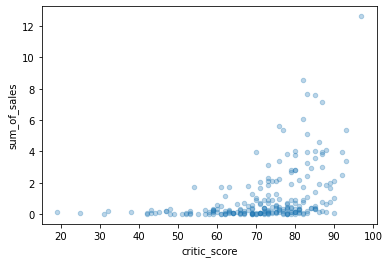

In [44]:
# Let's build a histogram, sort the data by the amount of sales
df_platform_sale_pvt_ps4.plot(x='critic_score', y='sum_of_sales', kind='scatter', alpha=0.3)

<AxesSubplot:xlabel='user_score', ylabel='sum_of_sales'>

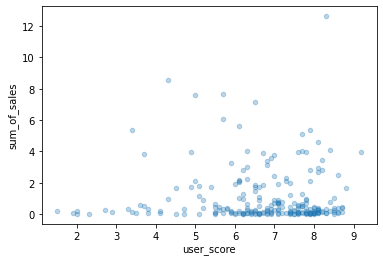

In [45]:
# Let's build a histogram, sort the data by the amount of sales
df_platform_sale_pvt_ps4.plot(x='user_score', y='sum_of_sales', kind='scatter', alpha=0.3)

In [46]:
# найдем коэффициенты корреляции Пирсона.
print('Pearson correlation coefficients (range -1 to 1) for player evaluation', (df_platform_sale_pvt_ps4['sum_of_sales'].corr(df_platform_sale_pvt_ps4['user_score'])).round(3))
print('Pearson correlation coefficients (range -1 to 1) for critic evaluation', (df_platform_sale_pvt_ps4['sum_of_sales'].corr(df_platform_sale_pvt_ps4['critic_score'])).round(3))

Pearson correlation coefficients (range -1 to 1) for player evaluation -0.019
Pearson correlation coefficients (range -1 to 1) for critic evaluation 0.423


Consider the value by platform PS3

In [47]:
df_platform_sale_ps3 = df[df['platform'].isin(['PS3'])]
display(df_platform_sale_ps3.head(3))
display('Sum of sales for all PS3 platform games 2012-2016:', df_platform_sale_ps3['sum_sales'].sum())



df_platform_sale_pvt_ps3 = df_platform_sale_ps3.pivot_table(index=['critic_score', 'user_score'], columns='platform', values='sum_sales', aggfunc=['sum']).reset_index()
df_platform_sale_pvt_ps3.columns = ['critic_score', 'user_score', 'sum_sales']

display(df_platform_sale_pvt_ps3.sort_values(by='sum_sales', ascending=False).head(3))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb,sum_sales
0,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
4,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
11,Call of Duty: Ghosts,PS3,2013.0,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36


'Sum of sales for all PS3 platform games 2012-2016:'

288.79

,critic_score,user_score,sum_sales
192,97.0,8.2,21.05
157,83.0,5.3,14.81
81,71.0,2.6,9.36


<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

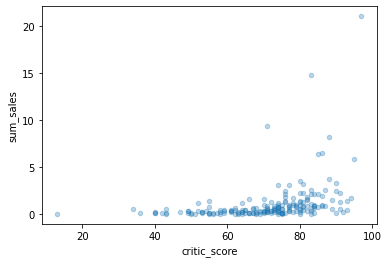

In [48]:
# Let's build a histogram, sort the data by the amount of sales
df_platform_sale_pvt_ps3.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.3)

<AxesSubplot:xlabel='user_score', ylabel='sum_sales'>

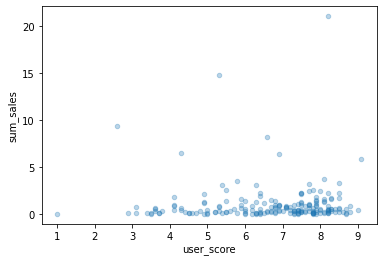

In [49]:
# Let's build a histogram, sort the data by the amount of sales
df_platform_sale_pvt_ps3.plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.3)

In [50]:
# find the Pearson correlation coefficients.
print('Pearson correlation coefficients (range -1 to 1) for player evaluation PS3', (df_platform_sale_pvt_ps3['sum_sales'].corr(df_platform_sale_pvt_ps3['user_score'])).round(3))
print('Pearson correlation coefficients (range -1 to 1) for critic evaluation PS3', (df_platform_sale_pvt_ps3['sum_sales'].corr(df_platform_sale_pvt_ps3['critic_score'])).round(3))

Pearson correlation coefficients (range -1 to 1) for player evaluation PS3 0.014
Pearson correlation coefficients (range -1 to 1) for critic evaluation PS3 0.353


Consider the value for the X360 platform

In [51]:
df_platform_sale_X360 = df[df['platform'].isin(['X360'])]
display(df_platform_sale_X360.head(3))
display('Sum of sales for all games platform X360 since 2015:', df_platform_sale_X360['sum_sales'].sum())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb,sum_sales
1,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
5,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
8,Call of Duty: Ghosts,X360,2013.0,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24


'Sum of sales for all games platform X360 since 2015:'

236.54000000000002

In [52]:
df_platform_sale_pvt_X360 = df_platform_sale_X360.pivot_table(index=['critic_score', 'user_score'], columns='platform', values='sum_sales', aggfunc=['sum']).reset_index()
df_platform_sale_pvt_X360.columns = ['critic_score', 'user_score', 'sum_sales']

display(df_platform_sale_pvt_X360.sort_values(by='sum_sales', ascending=False).head(3))

,critic_score,user_score,sum_sales
165,97.0,8.1,16.27
133,83.0,4.8,13.68
74,73.0,2.6,10.24


<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

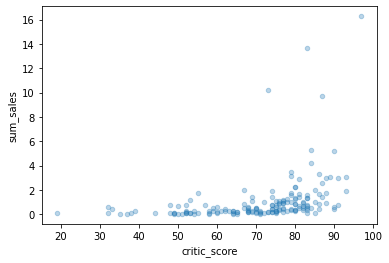

In [53]:
# Let's build a histogram, sort the data by the amount of sales
df_platform_sale_pvt_X360.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.3)

<AxesSubplot:xlabel='user_score', ylabel='sum_sales'>

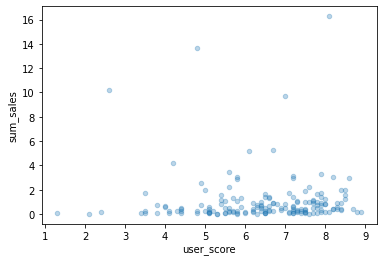

In [54]:
# Let's build a histogram, sort the data by the amount of sales
df_platform_sale_pvt_X360.plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.3)

In [55]:
# find the Pearson X360 correlation coefficients
print('Pearson correlation coefficients (range -1 to 1) for player evaluation X360', (df_platform_sale_pvt_X360['sum_sales'].corr(df_platform_sale_pvt_X360['user_score'])).round(3))
print('Pearson correlation coefficients (range -1 to 1) for critic evaluation X360', (df_platform_sale_pvt_X360['sum_sales'].corr(df_platform_sale_pvt_X360['critic_score'])).round(3))

Pearson correlation coefficients (range -1 to 1) for player evaluation X360 0.003
Pearson correlation coefficients (range -1 to 1) for critic evaluation X360 0.364


### Conclusions: feedback from players and critics

From the last two graphs for the PS4 platform, we can draw the following conclusions:
* There is a direct correlation between the rating of critics, the rating of players and the amount of sales, but it is weakly expressed.
* Judging by the Pearson coefficient (less than 0), the direct relationship between the amount of sales and the rating of the players is very low, and at the same time it is lower than the relationship between the amount of sales and the rating of the critics.
* Critics' rating has a greater correlation with sales than player's rating.
* The main range of ratings is in the region of 6-9 for players and 60-80 for critics, but at the same time it is clearly seen that the bulk of sales are at a fairly low level of up to 2 million copies.
* judging by the Pearson coefficient, the correlation for player ratings is always very low, the correlation for critics is also low, but always higher than for player ratings
* **Across all platforms, the picture of the amount of sales and user ratings and player ratings is approximately the same, everywhere critics' rating is a more accurate argument in assessing possible sales**

### Sales by genre

Consider the genres by the total amount of sales.

In [56]:
# sum up the number of sales for different platforms

df_genre_sum = df.groupby('genre')['sum_sales'].sum().sort_values(ascending=False)
display('Sum of sales by genre: 2012-2016:', df_genre_sum)

'Sum of sales by genre: 2012-2016:'

genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: sum_sales, dtype: float64

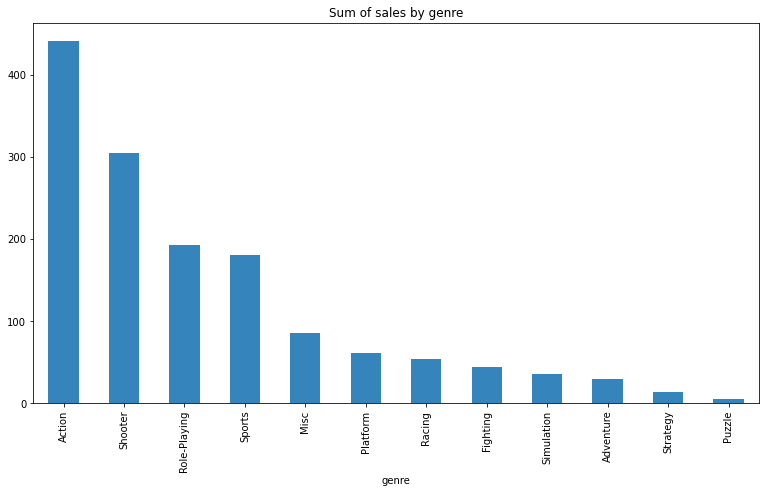

In [57]:
df_genre_sum.plot(title='Sum of sales by genre', kind='bar', figsize=(13, 7), alpha=0.9);

In [58]:
# Median for sales for different platforms

df_genre_median = df.groupby('genre')['sum_sales'].median().sort_values(ascending=False)
display('Median for sales by genre: 1995-2016:', df_genre_median)

'Median for sales by genre: 1995-2016:'

genre
Shooter         0.440
Sports          0.240
Platform        0.210
Role-Playing    0.140
Racing          0.140
Fighting        0.130
Action          0.120
Misc            0.120
Simulation      0.120
Strategy        0.080
Puzzle          0.045
Adventure       0.030
Name: sum_sales, dtype: float64

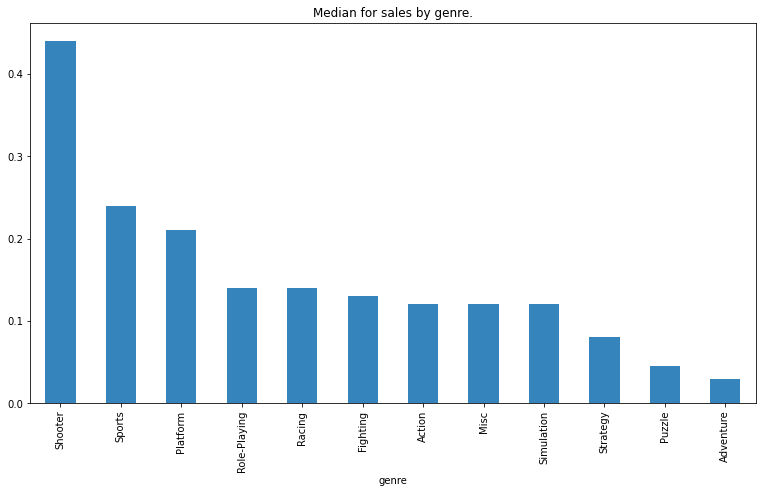

In [59]:
df_genre_median.plot(title='Median for sales by genre.', kind='bar', figsize=(13, 7), alpha=0.9);

### Conclusions: sales by genre

Based on the graph and figures, it is clearly seen that there are both the main sales leaders: Action and Sports, and clear outsiders: Strategy and Puzzle.

## User portrait by region <a id='4'></a>

### TOP sales: region - platform

Let's add a value with the sum of sales for three regions: North America, Europe, Japan.
    
Based on the sum of all sales in these regions, we will determine the most popular platform, genre, ESRB.

To do this, we will make a table with data grouping by different platforms.

In [60]:
# add the sum for three regions

df['sum_sales_nej'] = df['na_sales']+df['eu_sales']+df['jp_sales']
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb,sum_sales,sum_sales_nej
0,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,17.09
1,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,14.86
2,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,ND,14.63,12.25


In [61]:
# grouping data by platform

df_region_group = df.groupby('platform')['na_sales', 'eu_sales', 'jp_sales', 'sum_sales_nej'].sum().sort_values(by='sum_sales_nej', ascending=False).reset_index()
df_region_group.columns = ['platform', 'na_sales', 'eu_sales', 'jp_sales', 'sum_sales_nej']
display(df_region_group)
display('Summ of all sales:', df_region_group['sum_sales_nej'].sum().round(2))

C:\Users\Username\AppData\Local\Temp\ipykernel_45152\2941992058.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_region_group = df.groupby('platform')['na_sales', 'eu_sales', 'jp_sales', 'sum_sales_nej'].sum().sort_values(by='sum_sales_nej', ascending=False).reset_index()


,platform,na_sales,eu_sales,jp_sales,sum_sales_nej
0,PS4,108.74,141.09,15.96,265.79
1,PS3,103.38,106.86,35.29,245.53
2,X360,140.05,74.52,1.57,216.14
3,3DS,55.31,42.64,87.79,185.74
4,XOne,93.12,51.59,0.34,145.05
5,WiiU,38.10,25.13,13.01,76.24
6,PC,19.12,37.76,0.00,56.88
7,PSV,10.98,11.36,21.04,43.38
8,Wii,17.45,11.92,3.39,32.76
9,DS,4.59,3.53,3.72,11.84


'Summ of all sales:'

1290.37

In [62]:
platform_df = df_region_group[(df_region_group['sum_sales_nej'] > 60)]
platform_df = platform_df[['platform','sum_sales_nej']]
display(platform_df)

,platform,sum_sales_nej
0,PS4,265.79
1,PS3,245.53
2,X360,216.14
3,3DS,185.74
4,XOne,145.05
5,WiiU,76.24


From the above data, it is clearly seen that the market leaders in three regions are: PS2, X360, Wii, PS3, DS, with most sales coming from North America.

To estimate the market share of each platform, we will build a circular histogram, and enter the data manually. To calculate the remaining market share, subtract the top five sales from the total of all sales.

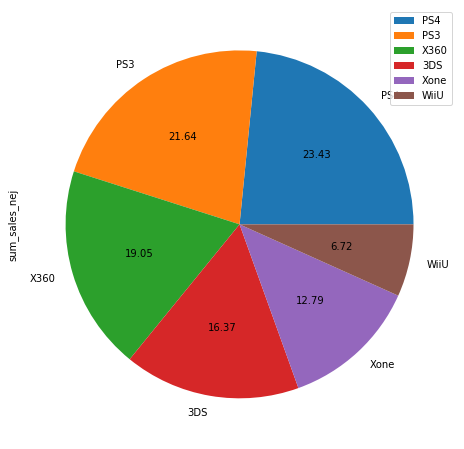

In [63]:
platform_df.plot(y='sum_sales_nej', kind='pie', figsize=(8, 8),
            autopct="%.2f",
           labels=["PS4", "PS3", "X360", "3DS","Xone", "WiiU"],
           );

### TOP sales: region - genre

To do this, we will create a pivot table with data grouped by genres.

In [64]:
# grouping data by genre

df_genre_group = df.groupby('genre')['na_sales', 'eu_sales', 'jp_sales', 'sum_sales_nej'].sum().sort_values(by='sum_sales_nej', ascending=False).reset_index()
df_genre_group.columns = ['genre', 'na_sales', 'eu_sales', 'jp_sales', 'sum_sales_nej']
print(df_genre_group)

           genre  na_sales  eu_sales  jp_sales  sum_sales_nej
0         Action    177.84    159.34     52.80         389.98
1        Shooter    144.77    113.47      9.23         267.47
2   Role-Playing     64.00     48.53     65.44         177.97
3         Sports     81.53     69.09      8.01         158.63
4           Misc     38.19     26.32     12.86          77.37
5       Platform     25.38     21.41      8.63          55.42
6         Racing     17.22     27.29      2.50          47.01
7       Fighting     19.79     10.79      9.44          40.02
8     Simulation      7.97     14.55     10.41          32.93
9      Adventure      8.92      9.46      8.24          26.62
10      Strategy      4.23      5.17      2.88          12.28
11        Puzzle      1.13      1.40      2.14           4.67


C:\Users\Username\AppData\Local\Temp\ipykernel_45152\4017770814.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_genre_group = df.groupby('genre')['na_sales', 'eu_sales', 'jp_sales', 'sum_sales_nej'].sum().sort_values(by='sum_sales_nej', ascending=False).reset_index()


### TOP sales: region - ESRB

To do this, we will create a pivot table with grouping data by rating ESRB.

In [65]:
df_rating_group = df.groupby('rating_esrb')['na_sales', 'eu_sales', 'jp_sales', 'sum_sales_nej'].sum().sort_values(by='sum_sales_nej', ascending=False).reset_index()
df_rating_group.columns = ['rating_esrb', 'na_sales', 'eu_sales', 'jp_sales', 'sum_sales_nej']
print(df_rating_group)

  rating_esrb  na_sales  eu_sales  jp_sales  sum_sales_nej
0           M    231.57    193.96     21.20         446.73
1          ND    103.31     91.50    108.84         303.65
2           E    114.37    113.03     28.33         255.73
3           T     66.02     52.96     26.02         145.00
4        E10+     75.70     55.37      8.19         139.26


C:\Users\Username\AppData\Local\Temp\ipykernel_45152\1531684107.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_rating_group = df.groupby('rating_esrb')['na_sales', 'eu_sales', 'jp_sales', 'sum_sales_nej'].sum().sort_values(by='sum_sales_nej', ascending=False).reset_index()


### Conclusions: sales by region

* for all platforms, genres and ESRB ratings, the situation is the same, the total amount of sales in all three regions maximally matches the amount of sales in a particular region
* Top sales for North America and Europe is occupied by the PS4 platform, for Japan 3DS.
* The undisputed leaders for all regions are the Action, Sports genres. The exception is Japan, where Role-Playing is in the first place and Action is in the second. (constant for different sample years)
* for all regions, the clear leader is games of category "M" (children from 17-nb years old). The exception is Japan, where games of the ND category (not determined) are in the first place. (constant for different sample years)

## Hypothesis testing <a id='5'></a>

### The average user ratings of the Xbox One and PC platforms are the same

Let's test the hypothesis: the average user ratings of the Xbox One and PC platforms are the same.

* Null Hypothesis: The average user ratings of the Xbox One and PC platforms are the same
*Alternative hypothesis: average user ratings of Xbox One and PC platforms are different

To do this, we will create two tables with data with user ratings for the Xbox One and PC platforms.

In [66]:
# отфильтруем данные с оценкой пользователей больше 0
# df = df.query('user_score > 0')

In [67]:
# test the hypothesis
alpha = 0.01

hypothesis_one = st.ttest_ind(
    df.query('platform == "XOne" & user_score > 0')['user_score'], 
    df.query('platform == "PC" & user_score > 0')['user_score'])

print('p-value:', hypothesis_one.pvalue )

if hypothesis_one.pvalue < alpha:
   
    print("Null hypothesis not confirmed")
else:
    print("Null hypothesis confirmed")

p-value: 0.5535080500643661
Null hypothesis confirmed


### The average user ratings for the Action and Sports genres are different.

Let's test the hypothesis: the average user ratings of the Xbox One and PC platforms are the same.

* Null hypothesis: Average user ratings for Action and Sports are the same
*Alternative hypothesis: Average user ratings for Action and Sports genres are different

To do this, we will create two tables with data with user ratings for the Action and Sports genres.

In [68]:
# filtering data Action and user_score > 0
df.query('genre == "Action" & user_score > 0')


df_ganre_action = df.query('genre == "Action"').reset_index(drop=True)
df_genre_sports  = df.query('genre == "Sports"').reset_index(drop=True)

# PC user ratings
user_score_action = df_ganre_action.loc[:, 'user_score']

# user ratings for XB
user_score_sports   = df_genre_sports.loc[:, 'user_score']

# set the level of statistical significance
alpha = 0.01 

#  test the hypothesis that the means 
# of two independent populations are equal
hypothesis_action_vs_sports = st.ttest_ind(
    user_score_action, 
    user_score_sports)
print('p-value:', hypothesis_action_vs_sports.pvalue) 

if hypothesis_action_vs_sports.pvalue > alpha:
   
    print("We accept the null hypothesis that the average user ratings for the Action and Sports genres are the same")
else:
    print("We accept an alternative hypothesis, the average user ratings for the Action and Sports genres are different")

p-value: nan
We accept an alternative hypothesis, the average user ratings for the Action and Sports genres are different


### General conclusion on hypotheses

* check values for Xbox One and PC are not possible due to lack of ratings for Xbox One
* average user ratings for Action and Sports are different

## Checking TOP sales by names

In the course of the analysis, a selection was found for the PS4 platform, with a total sales of 314.14 million copies, this game had sales of 69 million, which is approximately 22% of all sales. because for 2016, it is this platform that remains the most popular, consider the TOP sales by game titles of all time and the TOP sales for PS4.

* consider the TOP 5 best selling games of all time
* consider the TOP 5 games for the PS4 platform

In [69]:
df_name_sum = df.groupby('name')['sum_sales'].sum().sort_values(ascending=False)
print('Sum of sales across all categories', df_name_sum.head(5))

Sum of sales across all categories name
Grand Theft Auto V            56.58
Call of Duty: Black Ops II    29.40
Call of Duty: Ghosts          27.39
Call of Duty: Black Ops 3     25.67
Minecraft                     24.16
Name: sum_sales, dtype: float64


In [70]:
# filter the data for TOP 5 sales by name

df_name_sale = df[df['name'].isin(['Wii Sports', 'Grand Theft Auto V', 'Mario Kart Wii', 'Wii Sports Resort', 'Pokemon Red/Pokemon Blue'])]
display(df_name_sale.head(3))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb,sum_sales,sum_sales_nej
0,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,17.09
1,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,14.86
6,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,10.65


In [71]:
df_name_sale_pvt = df_name_sale.pivot_table(index=['year_of_release'], columns=['platform', 'name'], values='sum_sales', aggfunc=['sum']).reset_index()
#df_name_sale_pvt.columns = ['год_релиза', 'DS', 'PS', 'PS2','PS3','PS4','Wii','X360']

display(df_name_sale_pvt)

year_of_release                sum                     \
platform                                 PC                PS3   
name                     Grand Theft Auto V Grand Theft Auto V   
0                 2013.0                NaN              21.05   
1                 2014.0                NaN                NaN   
2                 2015.0               1.17                NaN   

                                                                   
platform                PS4               X360               XOne  
name     Grand Theft Auto V Grand Theft Auto V Grand Theft Auto V  
0                       NaN              16.27                NaN  
1                     12.62                NaN               5.47  
2                       NaN                NaN                NaN

This sample shows that the sales leader is Grand Theft Auto V for the entire period. Peak sales on the PS3 platform in 2013.

## Conclusions<a id='6'></a>

The following steps were taken in the analysis:
* open data
* all data is processed for explicit duplicates, data types are processed
* for "Player Rating" and "Critic Rating" empty values are processed, gaps are filled with median values, data type is changed
* for the "Ranking of players" a large number of passes were found, the relevance of the data is only 40%
* all data is filtered from 2012, due to the low level of previous sales, so the data was analyzed based on a sample of 5 years

**Conclusions based on the analysis and tested hypotheses:**
* the average life expectancy of the platform is 7-8 years
* there is a general drop in sales across all platforms
* market leaders by platform: Wii replaced by X360, replaced by PS3, replaced by PS4
*critics rating is a bigger indicator of possible sales than player ratings
* TOP-selling games across all Action and Sport genres
* TOP games sold by age limit from 3 years old, Uncategorized, then the trend is monitored, the higher the age of the audience, the less sales
* TOP sales by region North America, followed by Europe and only then Japan. At the same time, sales in Japan are two times lower than in North America.
* the hypothesis that the average user ratings of the Xbox One and PC platforms are the same was rejected, with a statistical significance of Alpha 0.01

* hypothesis average user ratings of the Action and Sports genres are different, confirming, with a statistical significance of Alpha 0.01
* **All platforms show roughly the same amount of sales and user and player evaluations; everywhere the critics' evaluation is a more accurate argument in estimating possible sales.**

**Recommendations for an advertising company.**

Based on the analysis made, we can recommend directing the main funds to the promotion of games on the PS4 platform, in the Action or Sport genres, in North America. When evaluating the potential of games, attention can be paid to the evaluation of critics.
Particular attention should be paid to the category of games for children from 10 years old.